# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [209]:
data = pd.read_csv("Dataset_clustering.csv")
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18.0,0.05,31.98,Bremen,2021-05-13,3
1,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4.0,0.00,6.56,Sachsen,2022-10-16,5
2,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,1.74,5.0,0.00,8.70,Niedersachsen,2023-08-13,0
3,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,1.80,15.0,0.00,27.00,Saarland,2022-10-06,5
4,ORD1669739,CUS3794,B2B,Vio Wasser,Water,0.98,6.0,0.05,5.59,Niedersachsen,2021-09-20,3


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60368 entries, 0 to 60367
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       60368 non-null  object 
 1   Customer_ID    60368 non-null  object 
 2   Customer_Type  60368 non-null  object 
 3   Product        60368 non-null  object 
 4   Category       60368 non-null  object 
 5   Unit_Price     60368 non-null  float64
 6   Quantity       60368 non-null  float64
 7   Discount       60368 non-null  float64
 8   Total_Price    60368 non-null  float64
 9   Region         60368 non-null  object 
 10  Order_Date     60368 non-null  object 
 11  Cluster        60368 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 5.5+ MB


In [ ]:
# Drop kolom
data = data.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date', 'Category', 'Customer_Type', 'Region', 'Discount', 'Unit_Price'])

In [212]:
encoder = LabelEncoder()
data["Product"] = encoder.fit_transform(data["Product"]) + 1

In [213]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nUkuran dataset:\nTraining: {X_train.shape}\nTesting: {X_test.shape}")

In [ ]:
scaler = StandardScaler()
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
# Fit dan transform hanya pada data training
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
# Transform data testing dengan scaler yang sudah di-fit pada data training
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [218]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

## Random Forest

In [219]:
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
)

In [220]:
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

Random Forest CV Accuracy: 0.9689 ± 0.0013


In [221]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

## Decision Tree


In [222]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

In [223]:
dt_cv_scores = cross_val_score(dt_model, X, y, cv=kf, scoring='accuracy')
print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")

Decision Tree CV Accuracy: 0.8916 ± 0.0068


In [224]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

### **Penjelasan dan Perbandingan Algoritma Decision Tree dan Random Forest**
Algoritma yang Digunakan dalam Klasifikasi

Dalam proses klasifikasi ini, digunakan dua algoritma machine learning, yaitu Decision Tree dan Random Forest. Kedua algoritma ini memiliki pendekatan berbeda namun saling terkait dalam membangun model klasifikasi. Berikut penjelasan masing-masing algoritma:

###**1. Decision Tree**
- Decision Tree adalah algoritma supervised learning yang membangun struktur seperti pohon, di mana setiap node internal merepresentasikan pengujian pada suatu atribut, setiap cabang merepresentasikan hasil pengujian, dan setiap node daun (leaf) merepresentasikan label kelas.

- Cara Kerja:
Algoritma mencari fitur dan threshold yang paling optimal untuk memisahkan data.
Proses pemisahan berulang secara rekursif hingga mencapai kriteria penghentian.
Decision Tree menggunakan metrik seperti Gini impurity atau Entropy untuk mengevaluasi kualitas pemisahan

- Kelebihan:
Mudah diinterpretasi dan divisualisasikan.
Mampu menangani fitur numerik dan kategorikal.
Memerlukan sedikit preprocessing data.
Dapat menangkap pola non-linear dalam data.

- Kekurangan: Cenderung overfitting pada data training jika tidak dibatasi. Sensitif terhadap variasi kecil dalam data.
Kurang stabil (perubahan kecil pada data da.pat menghasilkan tree yang sangat berbeda)

###**2. Random Forest**
- Random Forest adalah algoritma ensemble learning yang terdiri dari banyak Decision Tree. Algoritma ini bekerja dengan membangun beberapa pohon keputusan dari berbagai subset data, lalu melakukan pemungutan suara (voting) untuk menentukan hasil klasifikasi akhir.
- Cara Kerja: Membuat banyak Decision Tree dengan teknik bootstrap sampling (pengambilan sampel acak dengan pengembalian).
Untuk setiap node pada tree, hanya subset acak dari fitur yang dipertimbangkan untuk pemisahan.
Hasil akhir diperoleh dari voting mayoritas dari semua tree

- Kelebihan:
Akurasi lebih tinggi dibandingkan Decision Tree tunggal.
Lebih tahan terhadap overfitting.
Memberikan estimasi fitur mana yang penting dalam klasifikasi.
Bekerja baik dengan dataset berdimensi tinggi.

- Kekurangan:
Lebih kompleks dan memerlukan lebih banyak sumber daya komputasi.
Kurang interpretabel dibandingkan Decision Tree tunggal.
Waktu training yang lebih lama.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

## Random Forest

In [225]:
rf_y_pred = rf_model.predict(X_test)
rf_before_accuracy = accuracy_score(y_test, rf_y_pred)
rf_before_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_before_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_before_f1 = f1_score(y_test, rf_y_pred, average='weighted')

print("\n--- Random Forest Evaluation ---")
print(f"Accuracy: {rf_before_accuracy:.4f}")
print(f"Precision: {rf_before_precision:.4f}")
print(f"Recall: {rf_before_recall:.4f}")
print(f"F1-Score: {rf_before_f1:.4f}")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))


--- Random Forest Evaluation ---
Accuracy: 0.9696
Precision: 0.9706
Recall: 0.9696
F1-Score: 0.9689
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2561
           1       0.95      1.00      0.97      1391
           2       0.99      0.84      0.91      1234
           3       1.00      0.90      0.95      1735
           4       0.98      1.00      0.99      2582
           5       0.96      1.00      0.98      2571

    accuracy                           0.97     12074
   macro avg       0.97      0.96      0.96     12074
weighted avg       0.97      0.97      0.97     12074



In [226]:
# Decision Tree Predictions
dt_y_pred = dt_model.predict(X_test)
dt_before_accuracy = accuracy_score(y_test, dt_y_pred)
dt_before_precision= precision_score(y_test, dt_y_pred, average='weighted')
dt_before_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_before_f1 = f1_score(y_test, dt_y_pred, average='weighted')

print("\n--- Decision Tree Evaluation ---")
print(f"Accuracy: {dt_before_accuracy:.4f}")
print(f"Precision: {dt_before_precision:.4f}")
print(f"Recall: {dt_before_recall:.4f}")
print(f"F1-Score: {dt_before_f1:.4f}")
print("Classification Report:")
print(classification_report(y_test, dt_y_pred))


--- Decision Tree Evaluation ---
Accuracy: 0.8958
Precision: 0.9062
Recall: 0.8958
F1-Score: 0.8956
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2561
           1       0.94      0.86      0.90      1391
           2       0.99      0.74      0.85      1234
           3       1.00      0.81      0.90      1735
           4       0.95      1.00      0.97      2582
           5       0.78      0.95      0.86      2571

    accuracy                           0.90     12074
   macro avg       0.92      0.88      0.89     12074
weighted avg       0.91      0.90      0.90     12074



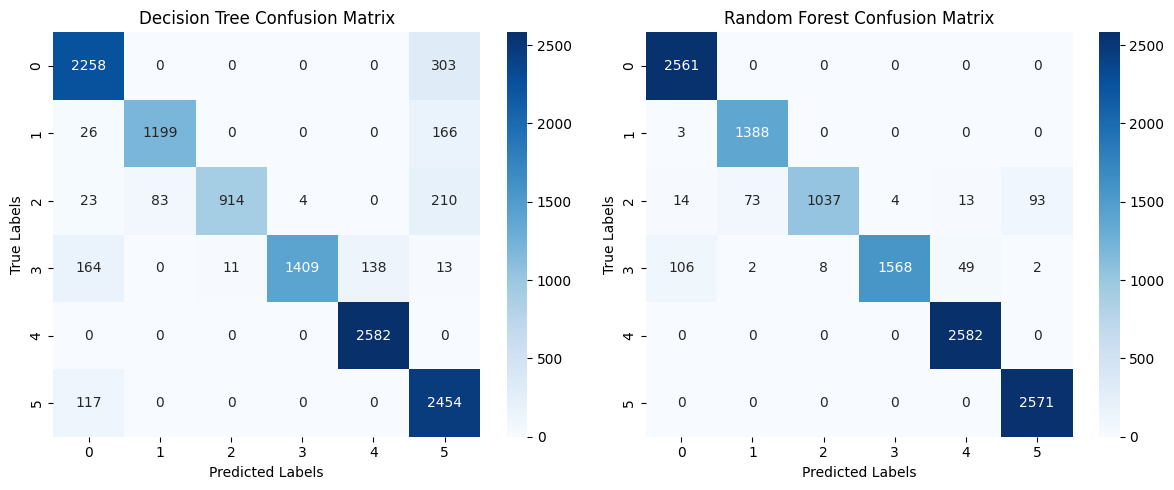

In [227]:
plt.figure(figsize=(12, 5))

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
dt_cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
rf_cm = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

### **Analisis Perbandingan Random Forest vs Decision Tree**

#### Metrik Performa Keseluruhan

| Metrik | Random Forest | Decision Tree | Perbedaan |
|--------|--------------|--------------|-----------|
| Akurasi | 0.9696 (97%) | 0.8958 (90%) | +7% |
| Presisi | 0.9706 | 0.9062 | +6.4% |
| Recall | 0.9696 | 0.8958 | +7.4% |
| F1-Score | 0.9689 | 0.8956 | +7.3% |

#### Performa per Kelas (F1-Score)

| Kelas | Random Forest | Decision Tree | Perbedaan |
|-------|--------------|--------------|-----------|
| 0 | 0.98 | 0.88 | +10% |
| 1 | 0.97 | 0.90 | +7% |
| 2 | 0.91 | 0.85 | +6% |
| 3 | 0.95 | 0.90 | +5% |
| 4 | 0.99 | 0.97 | +2% |
| 5 | 0.98 | 0.86 | +12% |

#### Weighted Average

| Metrik | Random Forest | Decision Tree |
|--------|--------------|--------------|
| Presisi | 0.97 | 0.91 |
| Recall | 0.97 | 0.90 |
| F1-Score | 0.97 | 0.90 |

#### Kesimpulan

Random Forest menunjukkan performa yang lebih unggul dibandingkan Decision Tree pada semua metrik evaluasi. Peningkatan terbesar terlihat pada kelas 0 dan 5 dengan perbedaan F1-Score sebesar 10% dan 12%. Hal ini sesuai dengan sifat algoritma Random Forest sebagai model ensemble yang menggabungkan banyak decision tree, sehingga menghasilkan prediksi yang lebih robust dan mengurangi risiko overfitting.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [228]:
# Decision Tree parameter grid
dt_param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [229]:
# Tuning Decision Tree
dt_random = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=dt_param_grid,
    n_iter=50,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1
)

dt_random.fit(X_train, y_train)

print("\nDecision Tree - Parameter terbaik:")
print(dt_random.best_params_)


Decision Tree - Parameter terbaik:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}


In [230]:
# Tuning Random Forest
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=10,
    cv=3,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random.fit(X_train, y_train)

print("\nRandom Forest - Parameter terbaik:")
print(rf_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Random Forest - Parameter terbaik:
{'n_estimators': np.int64(400), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(3), 'max_features': 'log2', 'max_depth': np.int64(35), 'bootstrap': False}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [231]:
# Evaluasi Decision Tree dengan parameter terbaik
dt_best = dt_random.best_estimator_
dt_pred = dt_best.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

print("\nDecision Tree - Hasil Evaluasi:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))


Decision Tree - Hasil Evaluasi:
Accuracy: 0.9861
Precision: 0.9862
Recall: 0.9861
F1-Score: 0.9860

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2561
           1       0.98      1.00      0.99      1391
           2       0.99      0.94      0.97      1234
           3       1.00      0.95      0.97      1735
           4       0.98      1.00      0.99      2582
           5       0.99      1.00      0.99      2571

    accuracy                           0.99     12074
   macro avg       0.99      0.98      0.98     12074
weighted avg       0.99      0.99      0.99     12074



In [232]:
# Evaluasi Random Forest dengan parameter terbaik
rf_best = rf_random.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("\nRandom Forest - Hasil Evaluasi:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Random Forest - Hasil Evaluasi:
Accuracy: 0.9805
Precision: 0.9808
Recall: 0.9805
F1-Score: 0.9802

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2561
           1       0.96      1.00      0.98      1391
           2       0.99      0.90      0.94      1234
           3       1.00      0.94      0.97      1735
           4       0.98      1.00      0.99      2582
           5       0.98      1.00      0.99      2571

    accuracy                           0.98     12074
   macro avg       0.98      0.97      0.98     12074
weighted avg       0.98      0.98      0.98     12074



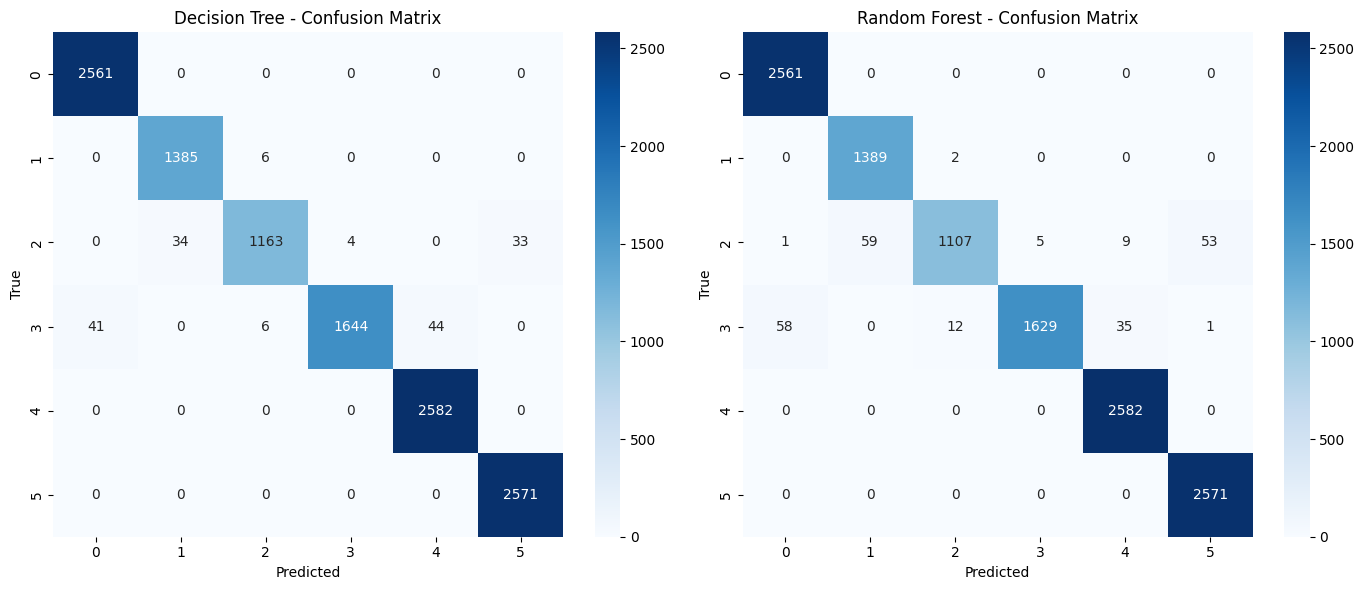

In [233]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(14, 6))

# Decision Tree Confusion Matrix
plt.subplot(1, 2, 1)
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Random Forest Confusion Matrix
plt.subplot(1, 2, 2)
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [234]:
comparison_data = {
    'Model': ['Decision Tree Sebelum', 'Decision Tree Setelah',
              'Random Forest Sebelum', 'Random Forest Setelah'],
    'Accuracy': [dt_before_accuracy, dt_accuracy, rf_before_accuracy, rf_accuracy],
    'Precision': [dt_before_precision, dt_precision, rf_before_precision, rf_precision],
    'Recall': [dt_before_recall, dt_recall, rf_before_recall, rf_recall],
    'F1-Score': [dt_before_f1, dt_f1, rf_before_f1, rf_f1]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

                   Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree Sebelum  0.895809   0.906185  0.895809  0.895641
1  Decision Tree Setelah  0.986086   0.986223  0.986086  0.985955
2  Random Forest Sebelum  0.969604   0.970623  0.969604  0.968854
3  Random Forest Setelah  0.980537   0.980850  0.980537  0.980236



##Hasil
###1. Perbandingan Hasil Sebelum dan Setelah Tuning

 Mengalami Peningkatan Performa

**Decision Tree:**
- **Sebelum tuning**: Accuracy: 0.895809, F1-Score: 0.895641
- **Setelah tuning**: Accuracy: 0.9861, F1-Score: 0.9860
- **Peningkatan**: +9.03% pada Accuracy, +9.04% pada F1-Score

**Random Forest:**
- **Sebelum tuning**: Accuracy: 0.969604, F1-Score: 0.968854
- **Setelah tuning**: Accuracy: 0.9805, F1-Score: 0.9802
- **Peningkatan**: +1.09% pada Accuracy, +1.14% pada F1-Score

###2. Identifikasi Kelemahan Model

**Potensi Overfitting**:
   - Meskipun performa model meningkat, perlu dipertimbangkan kemungkinan overfitting

###3. Rekomendasi Tindak Lanjut

**Cross Validation**:
  - Membagi data menjadi beberapa bagian (K-Fold) untuk menguji model secara berulang
  - Periksa apakah hasil model tetap baik pada semua bagian data
  
**Teknik Regularisasi Lanjutan**:
   - Evaluasi teknik pruning tambahan untuk Decision Tree
   - Eksplorasi pengaturan parameter lain seperti max_features pada Random Forest


